To compare TRI

Read each raster a X buffer 
Get the R2 and the RMSE from the metrics (error result file)
Plot each TRI histogram shape
Sumarize median


In [12]:
#Test

import matplotlib.pyplot as plt

tif_file='C:/Users/amgomez/Dropbox/Research/LOCSS/other_lakes/Selected_lakes/SRTM/STRM_Buffer/TRI_1km_660400.tif'
img = plt.imread(tif_file)

# img.plot.hist(ax=ax,
#                        color="purple",
#                        bins=30)

In [3]:
import rasterio
from matplotlib import pyplot
from rasterio.plot import show_hist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
tif_file='/home/angelica/Dropbox/Research/LOCSS/other_lakes/Selected_lakes/SRTM/STRM_Buffer/TRI_1km_660400.tif'
dir_srtm='/home/angelica/Dropbox/Research/LOCSS/other_lakes/Selected_lakes/SRTM/STRM_Buffer/'
dir_srtm='/home/angelica/Documents/py_linux/pylocss/data/TRI_nk/'

In [1]:
files

NameError: name 'files' is not defined

In [4]:
files = [f for f in os.listdir(dir_srtm) if os.path.isfile(os.path.join(dir_srtm, f))&(f.startswith('TRI')&f.endswith('.tif'))]

In [5]:
Xkm='5km'
files_Xkm=[f for f in files if Xkm in f]
files_Xkm[0].split('_')[3].split('.')[0]

'7250501702'

In [6]:
files_Xkm_id=[f.split('_')[3].split('.')[0] for f in files_Xkm]
files_Xkm_id
df_files=pd.DataFrame({'lake_id':files_Xkm_id,'file_name':files_Xkm}).sort_values(by='lake_id')
df_files.shape

(92, 2)

In [22]:
#Calculating stats

rastervals=pd.DataFrame()

for f in df_files['file_name'].values:
    # im=plt.subplot(row_f,col_f,nfig) 
    
    src = rasterio.open(dir_srtm+f)
    rvalues=src.read(1)
    notnan_rvalues=rvalues[~np.isnan(rvalues)]
    p90=np.percentile(notnan_rvalues,90)
    
    st_id=f.split('_')[3].split('.')[0]
    if st_id=='RAW2': #Taking RAW2 out since is not a valid lake
        continue
    vals=pd.DataFrame({st_id:rvalues[(rvalues>0) & (rvalues<p90)]})
    rastervals=pd.concat((rastervals,vals), axis=1)
    src.close()



In [29]:
rastervals_Xkm=rastervals
r_median=rastervals_Xkm.median()
r_mean=rastervals_Xkm.mean()
r_max=rastervals_Xkm.max()
r_min=rastervals_Xkm.min()
r_count=rastervals_Xkm.count()
r_std=rastervals_Xkm.std()
r_median.shape

(92,)

In [42]:
df_stats=pd.DataFrame({'median':r_median, 'mean':r_mean, 'max':r_max,'min':r_min,'count':r_count,'std':r_std}).reset_index()
df_stats=df_stats.rename(columns={'index':'lake_id'})

df_stats=df_stats.sort_values(by='mean')
df_stats

,lake_id,median,mean,max,min,count,std
45,7320414542,0.078740,0.120831,0.519134,0.010000,269417,0.110818
9,21,0.150000,0.200695,0.736275,0.010000,133607,0.157329
46,7320415112,0.103923,0.212896,1.090367,0.010000,218801,0.249630
33,7121120312,0.192612,0.266749,1.141079,0.009979,418794,0.239346
47,7320417422,0.187351,0.291694,1.272319,0.009999,142339,0.285632
...,...,...,...,...,...,...,...
77,7830011152,22.554689,22.573465,48.191807,0.009995,647128,13.002148
14,6610142963,26.308580,25.658697,49.128391,0.017302,429002,12.950374
76,7820068182,28.135859,27.671549,48.570698,0.014070,510885,11.040441
81,7830198862,33.900326,32.903809,59.460556,0.010010,699480,14.053806


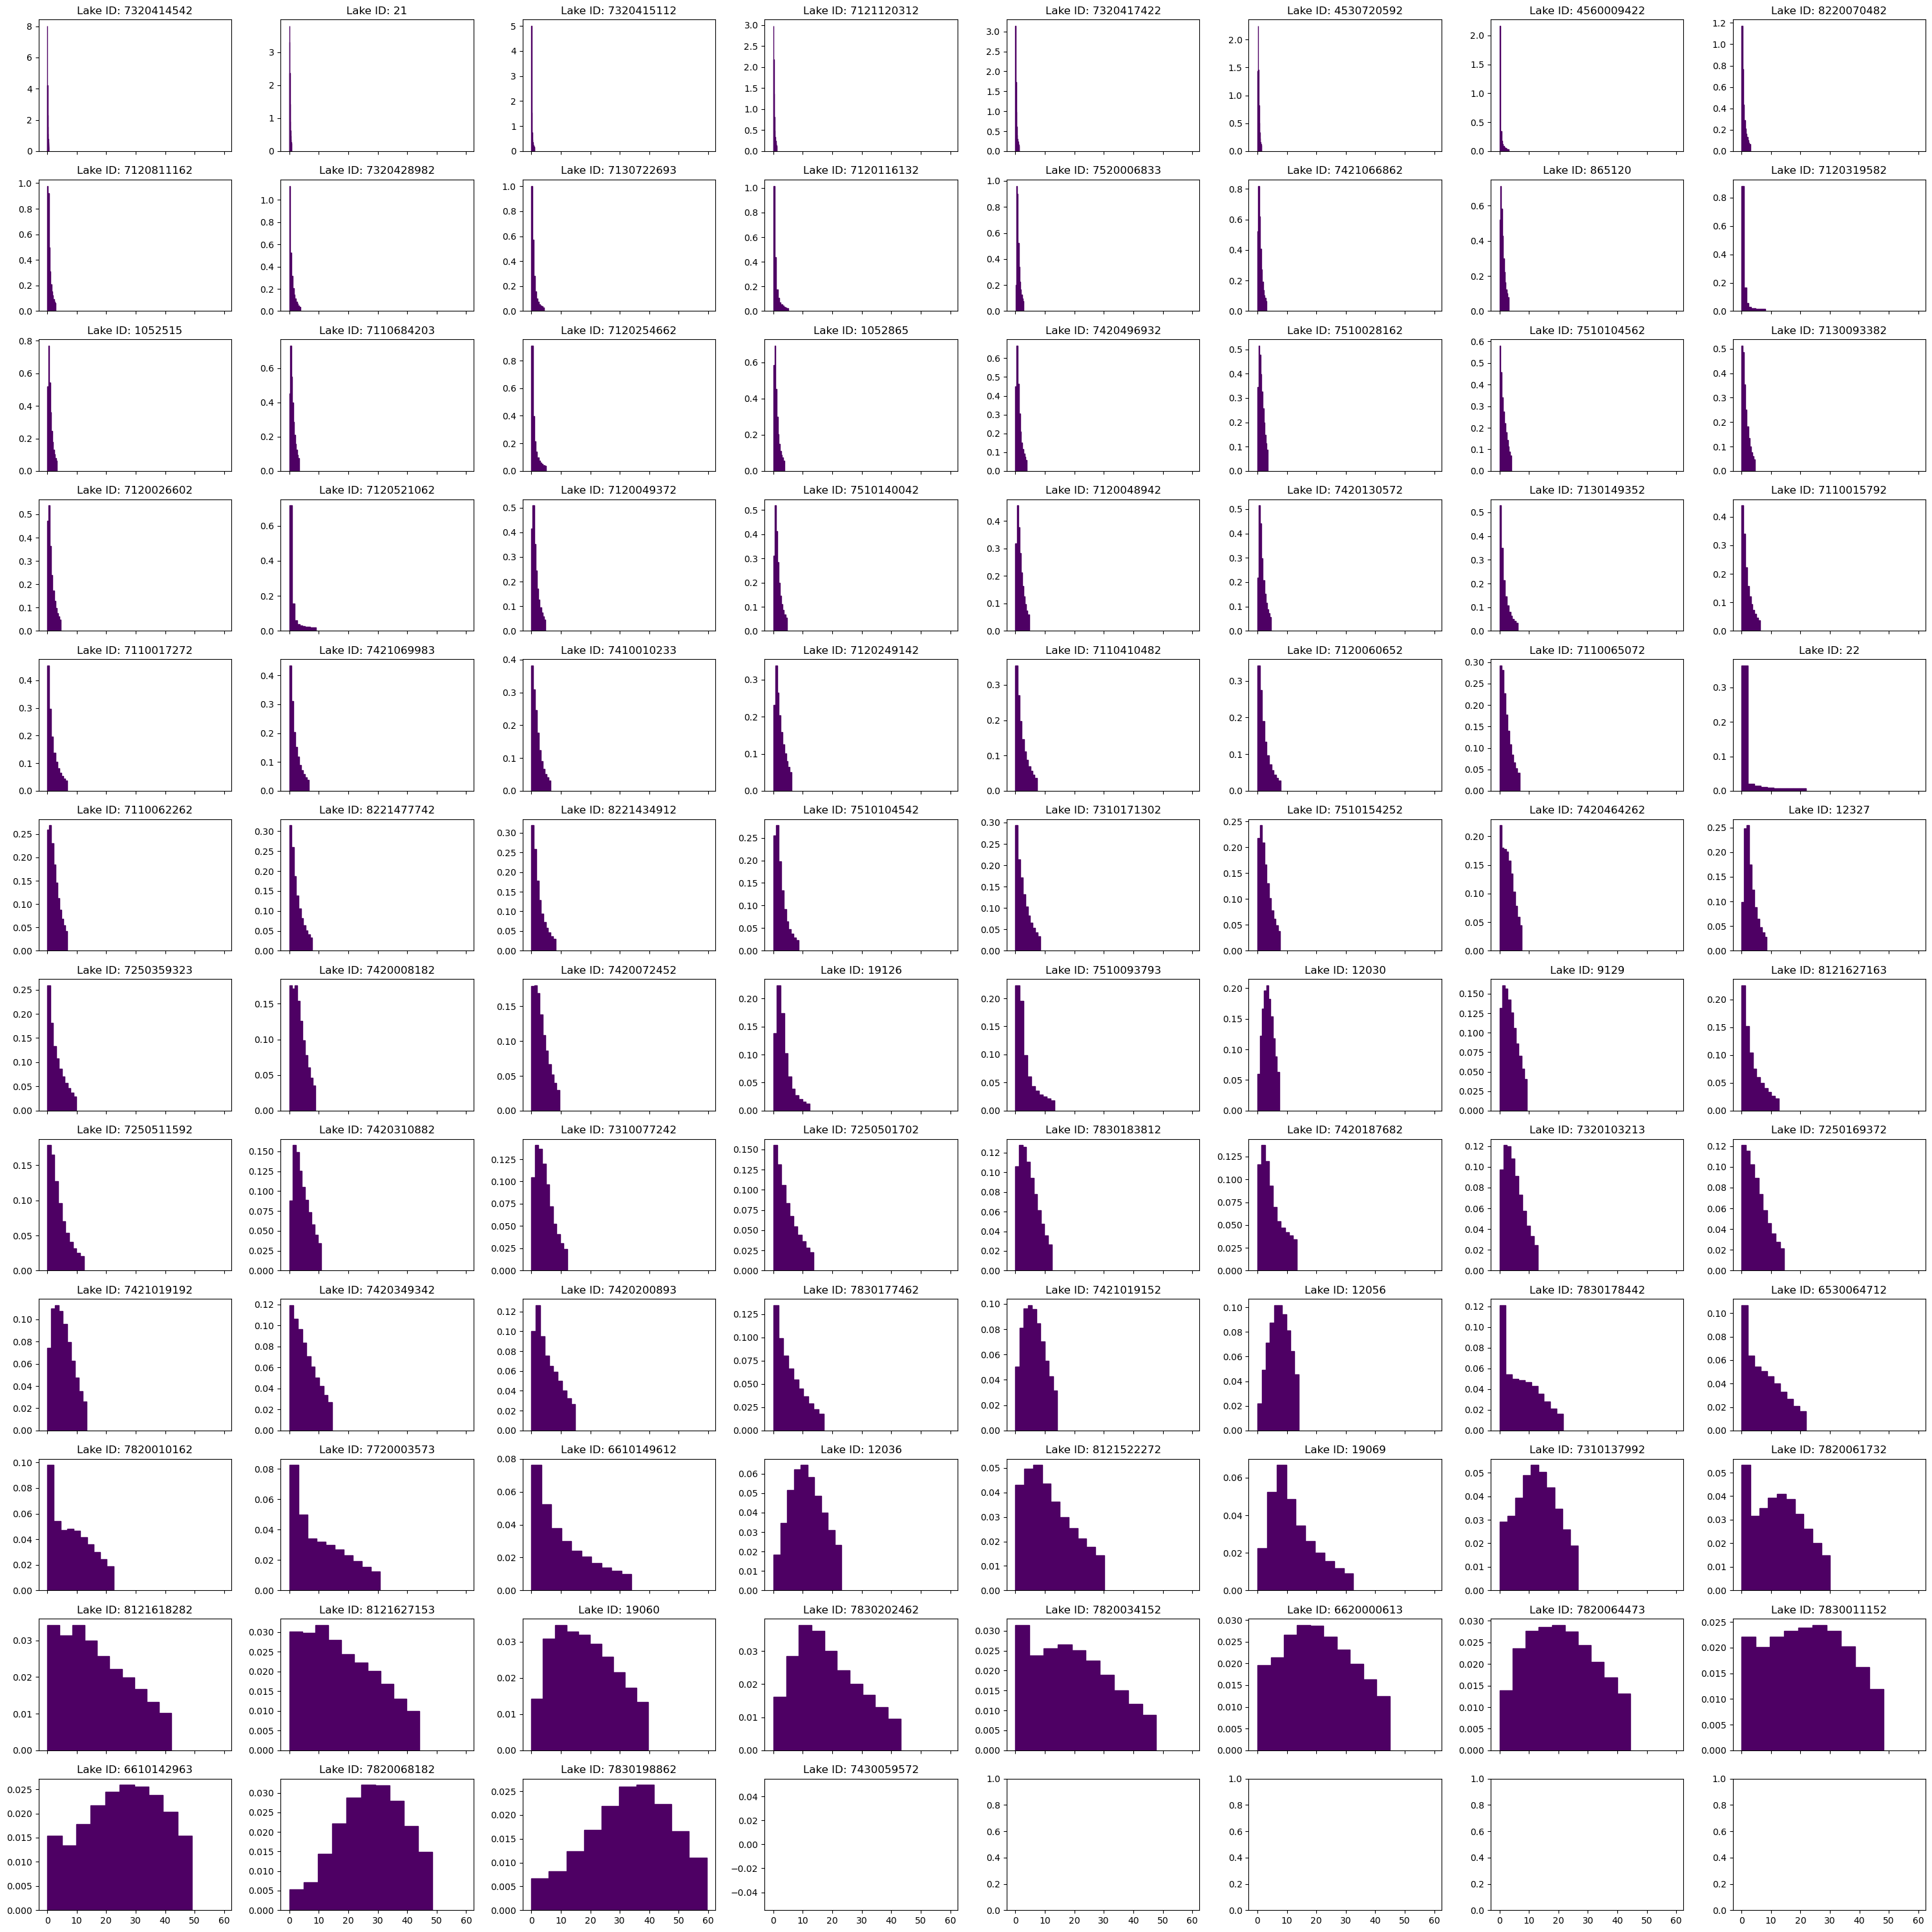

In [44]:

df=rastervals.copy()
items=df_stats['lake_id']
row_f=12
col_f=8
nfig=1
fig, axes = plt.subplots(nrows=row_f, ncols=col_f, figsize=(30, 30), sharex=True)
ax=0
ay=-1

for f in items:
    rvalues=df[f]
    notnan_rvalues=rvalues[~np.isnan(rvalues)]
    lk_id=f
    if ay<col_f-1:
        ay+=1
        # if ax==row_f:
        # ax+=1
    else:
        ay=0
        ax+=1
    axes[ax][ay].hist(notnan_rvalues, color='#4e0064', ec='#4e0064', density=True)
    axes[ax][ay].set_title('Lake ID: '+ lk_id)
fig.tight_layout()      
# fig.subplots_adjust(right=0.80, bottom=0.1, top=0.8)
plt.savefig('../data/results/TRI_5km_lakes.png')
plt.show()

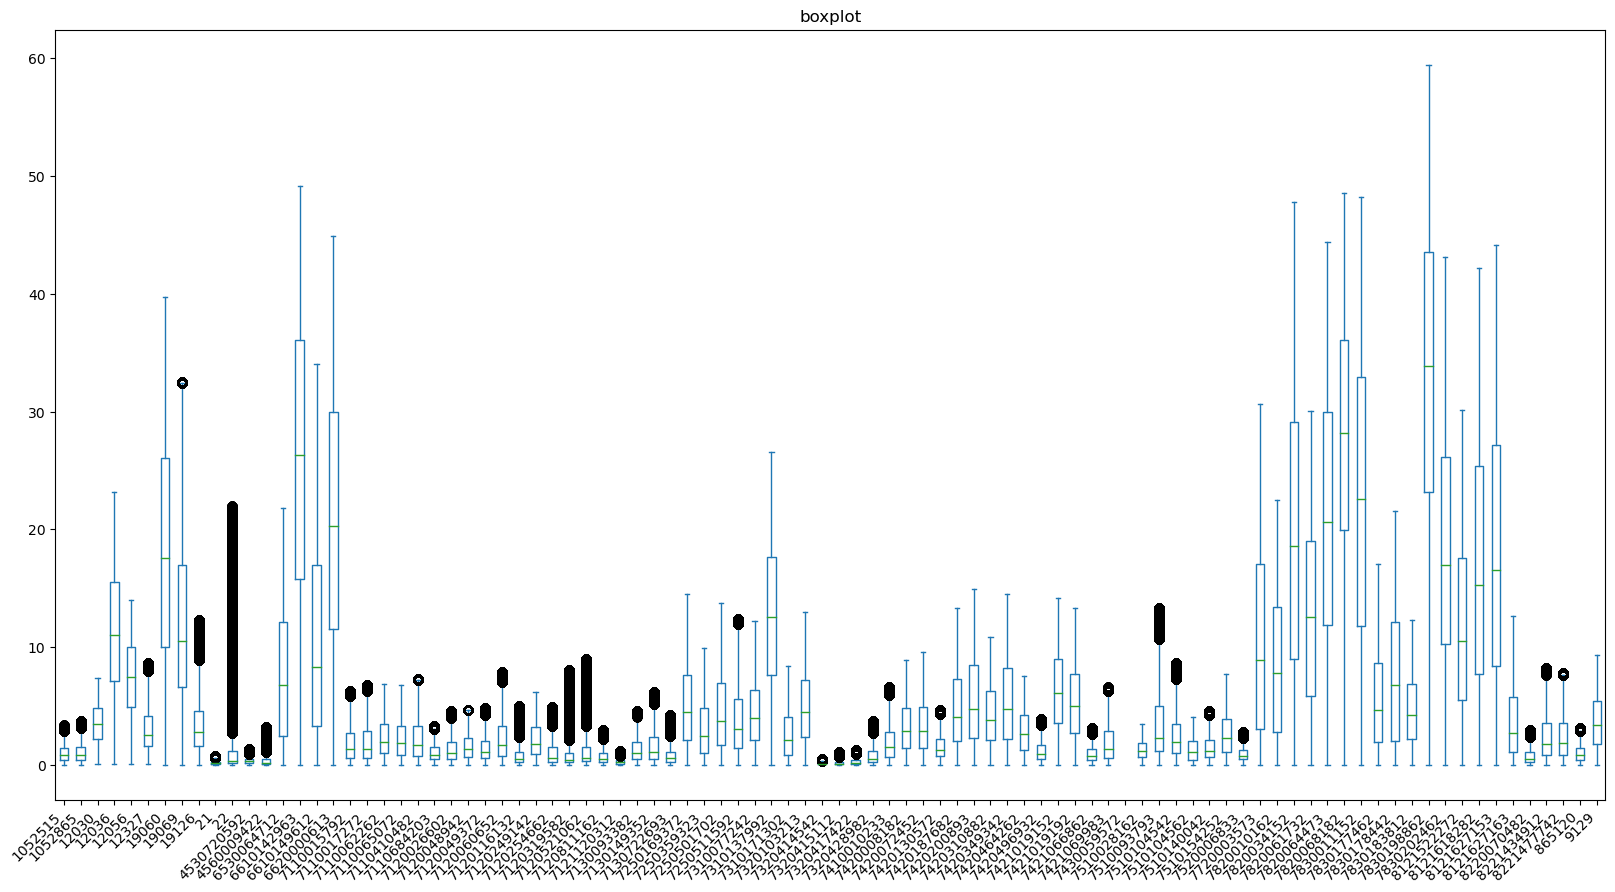

In [41]:
from matplotlib import pyplot as plt

# Set the figure size
plt.rcParams["figure.figsize"] = [20, 10]

ax = rastervals_Xkm.plot(kind='box', title='boxplot')
for label in ax.get_xticklabels(which='major'):
        label.set(rotation=45, horizontalalignment='right')
        # title_obj = pyplot.title(f)
    # color_bar = pyplot.colorbar() 
plt.savefig('../data/results/TRI_5km_lakes_variability_2.png')
plt.show()
    # nfig+=1

In [8]:
# rvalues.notna()
rastervals

,1052515,1052865,12030,12036,12056,12327,19060,19069,19126,21,...,7830202462,8121522272,8121618282,8121627153,8121627163,8220070482,8221434912,8221477742,865120,9129
0,0.297827,1.015331,1.371825,20.563040,5.730115,2.373893,1.577740,3.420523,1.687047,0.117047,...,4.174352,4.166849,0.205586,3.519328,1.313403,0.145962,0.581379,7.772397,0.755902,0.209292
1,0.391794,1.852735,1.317652,21.349884,6.366444,2.181049,4.327499,4.250382,2.621448,0.453762,...,2.762422,4.048690,0.214270,3.846214,1.467769,0.092708,0.183855,6.052349,0.683733,0.253385
2,0.382893,1.933501,1.248637,19.303898,6.198508,2.353515,5.911303,5.340097,2.384091,0.483529,...,1.532231,3.323420,0.200464,3.941286,1.222135,0.052967,0.144916,3.607927,0.550875,0.425078
3,0.251784,1.775652,1.656261,13.414909,6.783015,2.002469,7.324999,6.169937,2.546790,0.615630,...,1.389598,2.385306,0.208882,4.168467,0.842582,0.258260,0.337643,2.922887,0.385534,0.778707
4,0.285308,1.174187,2.832257,6.649077,4.685100,1.833442,7.507124,6.457382,3.027482,0.089443,...,1.462180,2.760946,0.251234,4.955268,0.784004,0.358461,1.450180,2.514682,0.344404,1.044096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.072457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1391386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.206949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1391387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.424802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1391388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.292960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
rvalues[:]

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

(92,)

In [28]:
type(r_median)

pandas.core.series.Series

In [11]:


# df_stats.loc[df_stats['gauge_id']=='660400', 'gauge_id']='6604000'

In [12]:
df_stats

,gauge_id,median,mean,max,min,count,std
0,1052515,0.789163,1.016245,3.346628,0.009995,117937,0.757282
1,1052865,0.800561,1.072611,3.703969,0.009995,120916,0.852624
2,12030,3.459993,3.558611,7.407310,0.029999,415294,1.748765
3,12036,11.027066,11.354997,23.134216,0.026460,209049,5.544258
4,12056,7.415425,7.416240,13.989399,0.086606,146788,3.318524
...,...,...,...,...,...,...,...
87,8220070482,0.484289,0.744729,2.936770,0.009949,447920,0.687773
88,8221434912,1.782882,2.401616,8.194349,0.009995,575847,2.013432
89,8221477742,1.812943,2.379916,7.832623,0.009995,692852,1.945369
90,865120,0.822126,1.009715,3.100117,0.010010,151201,0.725085


In [13]:
df_stats.to_csv('../data/results/TRI_stats_5km_20230324.csv', sep=',')

In [9]:
path_results='../data/results/comparison_ALL_20220525_17_38.csv'
# path_results='/data/results/comparison_LOCSS_20220525_18_48.csv'


df_results=pd.read_csv(path_results)
stations=df_results.station.unique()
stations

array(['1824', '2028', '2234', '2316', '12030', '12036', '19060', '19069',
       '19126', '2464800', '6604000', '6903880', 'BTN2', 'CFN2', 'HMT2',
       'KHB2', 'PHN2', 'QUL2', 'SAW2', 'SLL2', 'TAB2', 'WEW2', 'YSL2'],
      dtype=object)

In [10]:
for st in stations:
    if st not in df_stats['gauge_id'].values:
        print(st)

In [83]:
 os.path.isfile(path_results)

False

In [89]:
c=os.getcwd()
c+c+path_results

'C:\\Users\\amgomez\\Documents\\Python Scripts\\pylocssC:\\Users\\amgomez\\Documents\\Python Scripts\\pylocss/data/results/comparison_ALL_20220525_17_38.csv'

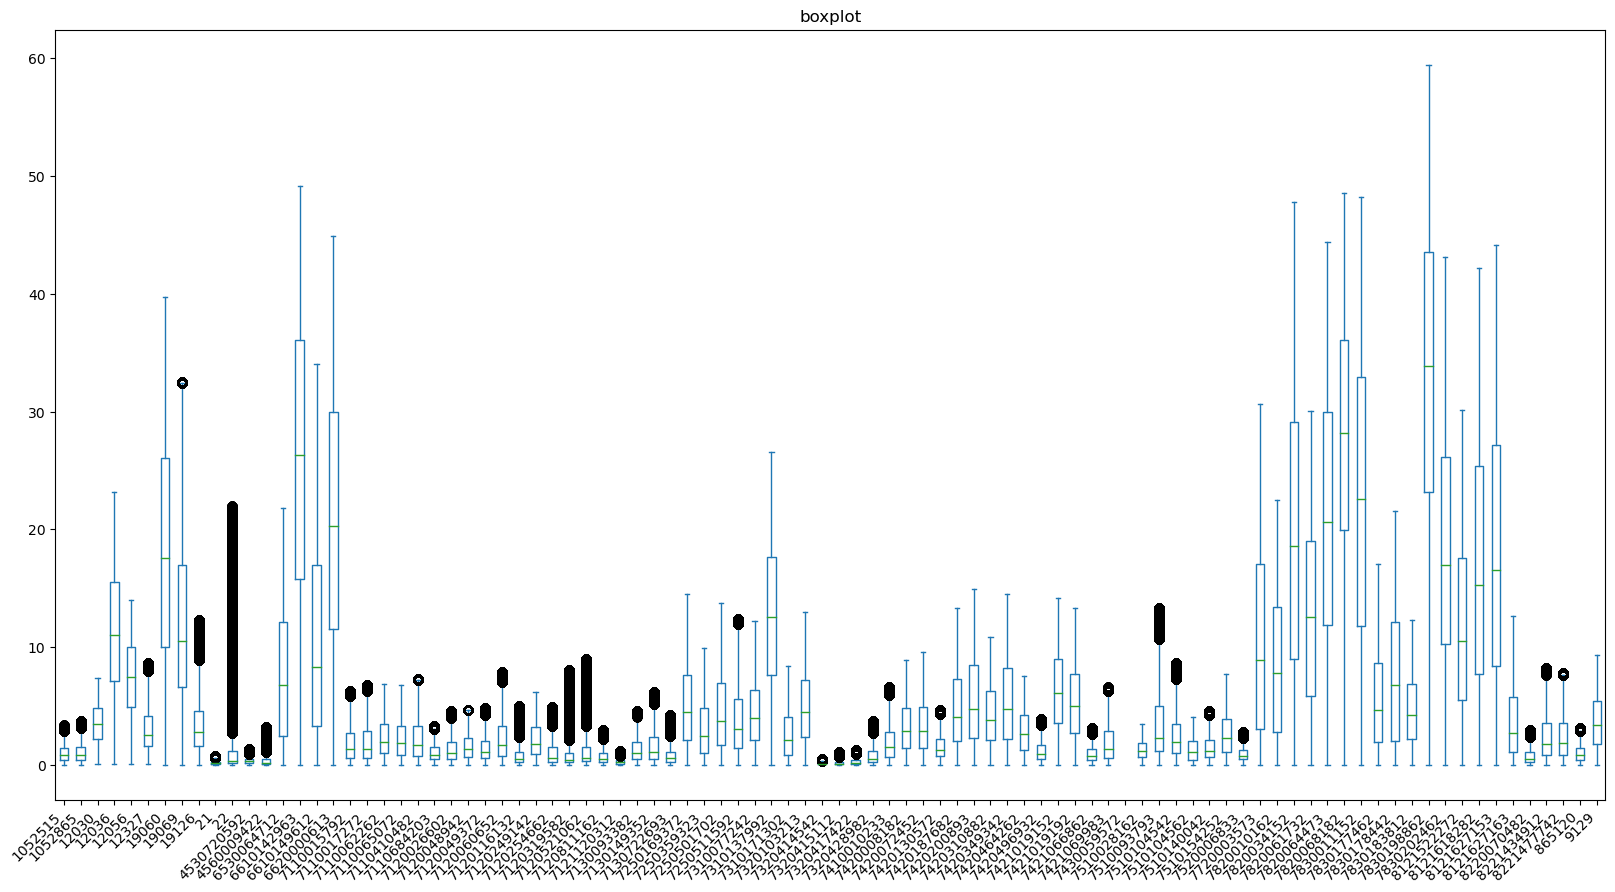

In [58]:
files_1km=[f for f in files if '1km' in f]

In [59]:
len(files_1km)

38

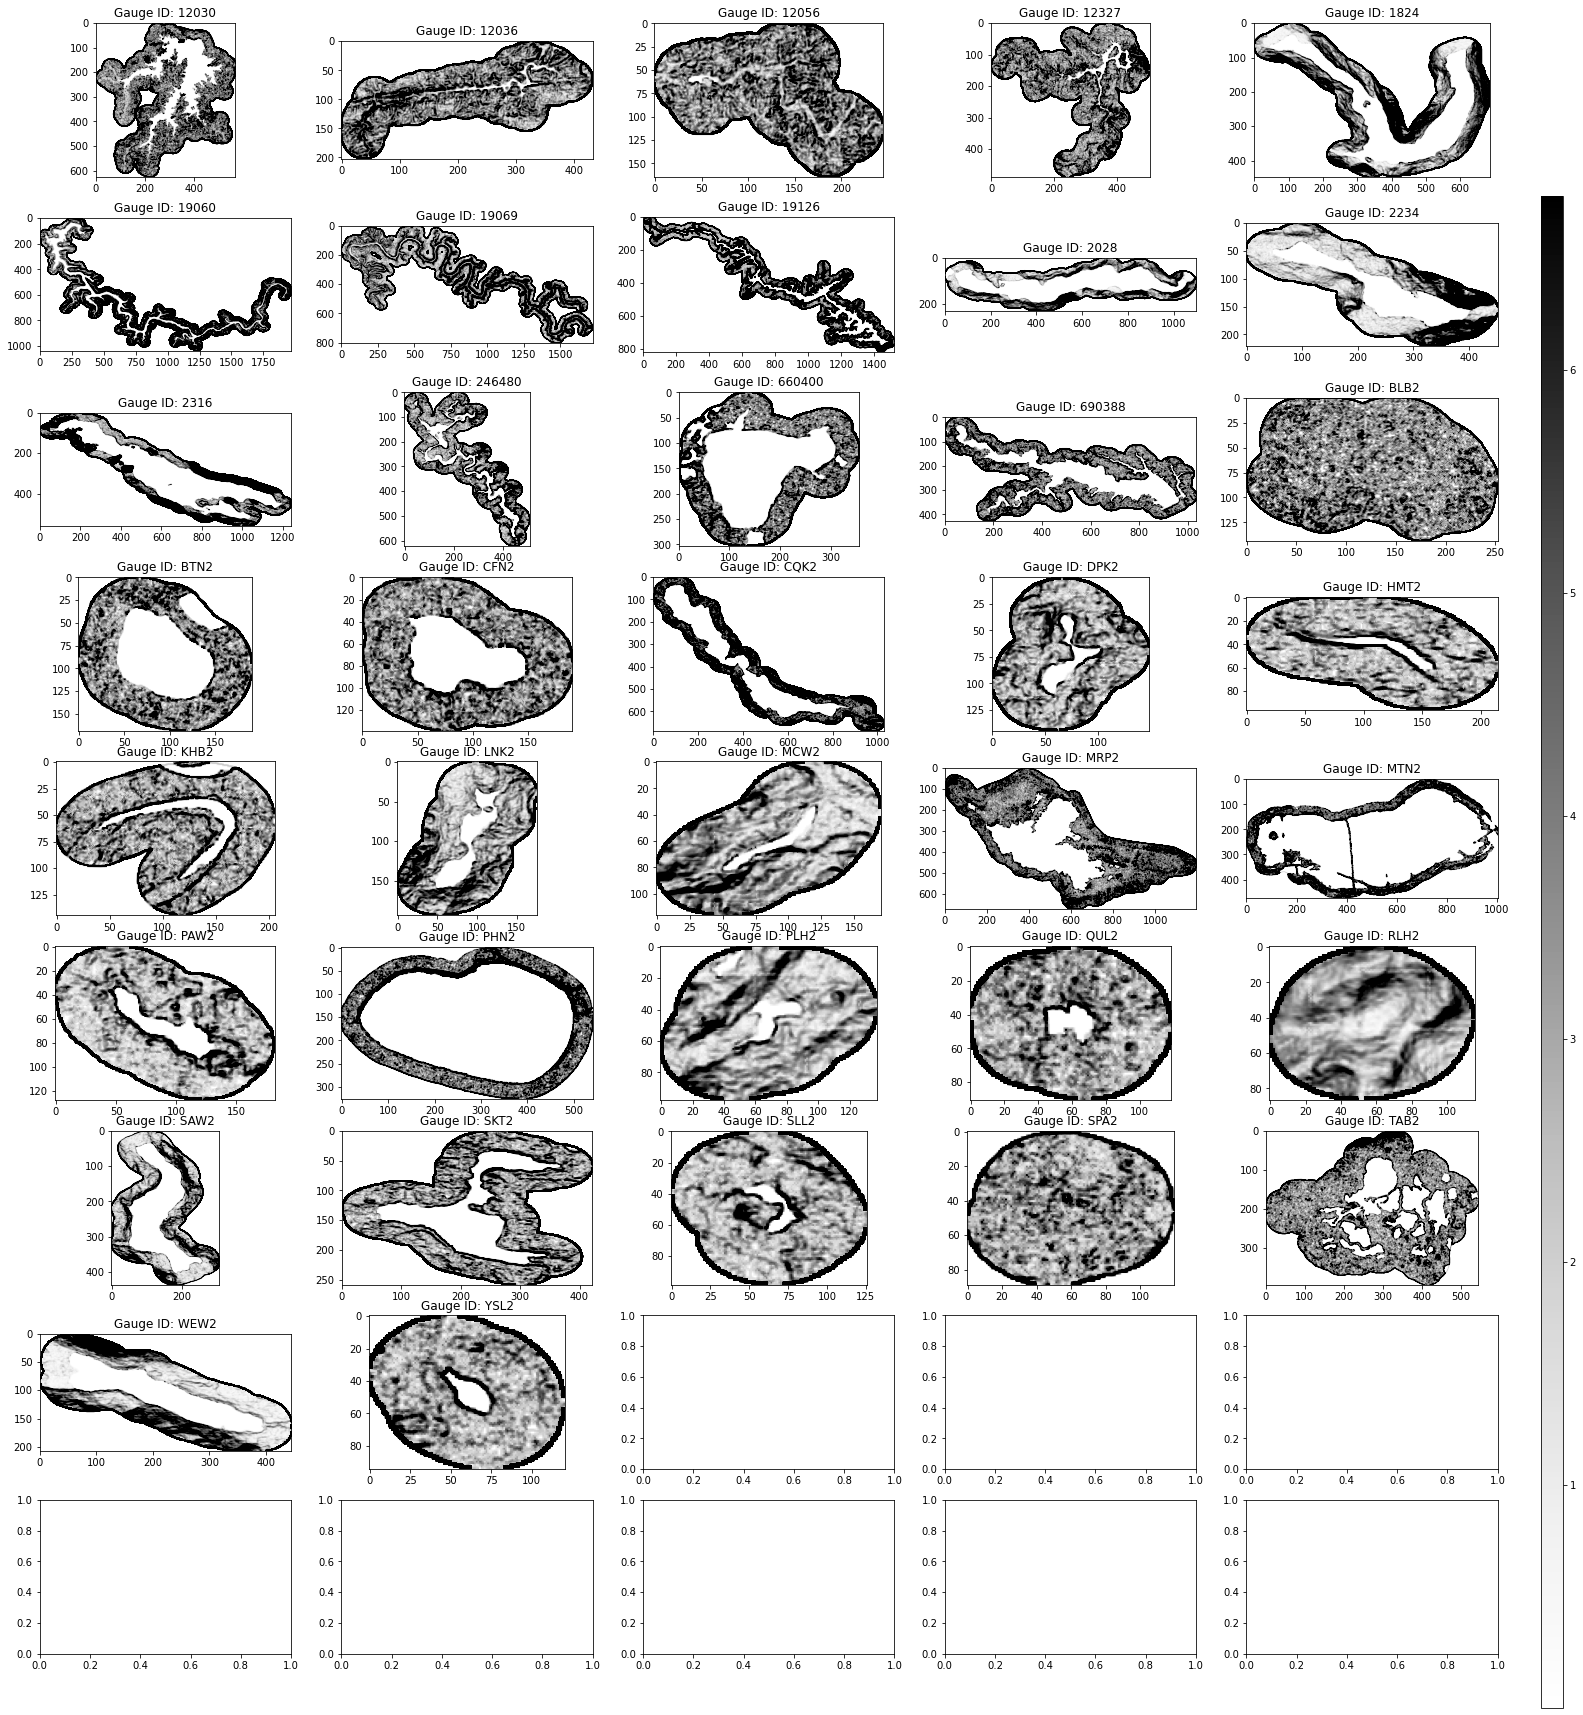

In [61]:

row_f=9
col_f=5
nfig=1
fig, axes = plt.subplots(nrows=row_f, ncols=col_f, figsize=(30, 30))
ax=0
ay=-1
rastervals=pd.DataFrame()

for f in files_1km:
    # im=plt.subplot(row_f,col_f,nfig) 
    
    src = rasterio.open(dir_srtm+f)
    rvalues=src.read(1)
    # ic(rvalues.shape)
    p90=np.percentile(rvalues,90)
    
    st_id=f.split('_')[2].split('.')[0]
    if st_id=='RAW2': #Taking RAW2 out since is not a valid lake
        continue
    vals=pd.DataFrame({st_id:rvalues[(rvalues>0) & (rvalues<p90)]})
    rastervals=pd.concat((rastervals,vals), axis=1)
# rvalues=rvalues[(rvalues>0) & (rvalues<p90)]
# rvalues.shape
    if ay<col_f-1:
        ay+=1
        # if ax==row_f:
        # ax+=1
    else:
        ay=0
        ax+=1
    # ic((ax,ay))
    # ax=axes[ax][ay]
    im=axes[ax][ay].imshow(rvalues, cmap='Greys',vmin=0.0001, vmax=p90)
    axes[ax][ay].set_title('Gauge ID: '+ st_id)
        
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.1, 0.01, 0.7])
fig.colorbar(im, cax=cbar_ax)
        # title_obj = pyplot.title(f)
    # color_bar = pyplot.colorbar() 
# plt.savefig('../data/results/TRI_1km_lakes.png')
plt.show()
    # nfig+=1

In [63]:
rastervals_1km=rastervals
rastervals_1km=rastervals_1km.rename(columns={'660400':'6604000',
                                             '246480':'2464800',
                                             '690388':'6903880'})
r_median=rastervals_1km.median()
r_mean=  rastervals_1km.mean()
r_max=   rastervals_1km.max()
r_min=   rastervals_1km.min()
r_count= rastervals_1km.count()
r_std=   rastervals_1km.std()
r_median.index

Index(['12030', '12036', '12056', '12327', '1824', '19060', '19069', '19126',
       '2028', '2234', '2316', '2464800', '6604000', '6903880', 'BLB2', 'BTN2',
       'CFN2', 'CQK2', 'DPK2', 'HMT2', 'KHB2', 'LNK2', 'MCW2', 'MRP2', 'MTN2',
       'PAW2', 'PHN2', 'PLH2', 'QUL2', 'RLH2', 'SAW2', 'SKT2', 'SLL2', 'SPA2',
       'TAB2', 'WEW2', 'YSL2'],
      dtype='object')

In [67]:
df_stats=pd.DataFrame({'median':r_median, 'mean':r_mean, 'max':r_max,'min':r_min,'count':r_count,'std':r_std}).reset_index()
df_stats=df_stats.rename(columns={'index':'gauge_id'})
df_stats.to_csv('../data/results/TRI_stats_1km.csv', sep=',')

In [65]:
for st in stations:
    if st not in df_stats['gauge_id'].values:
        print(st)

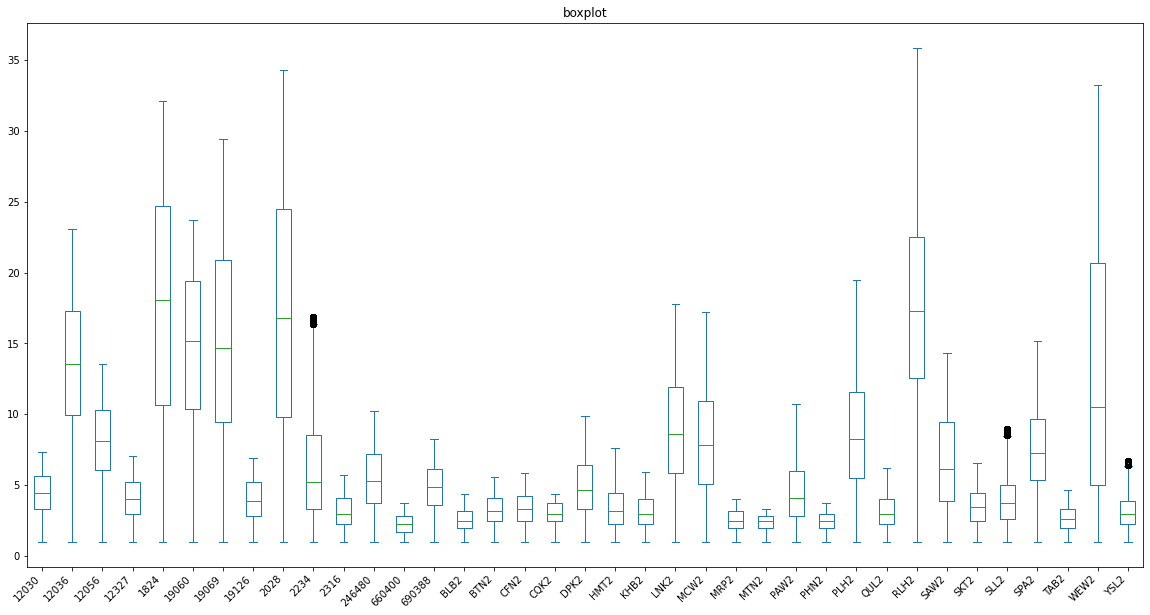

In [66]:
from matplotlib import pyplot as plt

# Set the figure size
plt.rcParams["figure.figsize"] = [20, 10]

ax = rastervals.plot(kind='box', title='boxplot')
for label in ax.get_xticklabels(which='major'):
        label.set(rotation=45, horizontalalignment='right')
        # title_obj = pyplot.title(f)
    # color_bar = pyplot.colorbar() 
plt.savefig('../data/results/TRI_1km_lakes_variability.png')
plt.show()

ic| rvalues.shape: (528, 693)


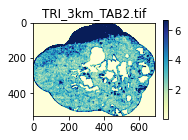

ic| rvalues.shape: (220, 302)


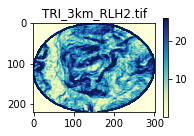

In [ ]:
from icecream import ic
row_f=2
col_f=2
nfig=1

fig, axes = plt.subplots(nrows=2, ncols=2)
fig = plt.figure(figsize=(20, 10))

for f in ['TRI_3km_TAB2.tif', 'TRI_3km_RLH2.tif']:
    im=plt.subplot(row_f,col_f,nfig) 
    src = rasterio.open(dir_srtm+f)
    rvalues=src.read(1)
    ic(rvalues.shape)
    p90=np.percentile(rvalues,90)
# rvalues=rvalues[(rvalues>0) & (rvalues<p90)]
# rvalues.shape
    pyplot.imshow(rvalues, cmap='YlGnBu',vmin=0.0001, vmax=p90)
    title_obj = pyplot.title(f)
    color_bar = pyplot.colorbar() 
    pyplot.show()

In [22]:
src.read(1).flatten().mean()

17.385874

In [20]:
len(src.read(1).flatten())

108224

In [31]:
rgt0=np.array([a for a in src.read(1).flatten() if a>0])

In [38]:
np.percentile(rgt0,50)#mean()

2.8284270763397217

In [27]:
band_max

0.0